In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn stuff like train_test_split, StandardScaler, linearregression, randomforestregressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,City Name,Latitude,Longitude,Elevation (m),Temperature (°C),Land Cover,Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
0,City_236,40.014907,135.759794,1657.234222,32.140727,Industrial,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664,13551.38192
1,City_487,-81.752906,67.784550,1781.007943,28.199772,Water,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768,41967.28373
2,City_21,20.126899,33.924075,3140.598901,11.492930,Water,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602,17335.37251
3,City_216,-47.308667,154.638241,992.282813,34.909265,Green Space,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698,31400.53605
4,City_292,-83.425194,31.018268,597.192562,28.465786,Water,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878,27399.94789


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118055 entries, 0 to 118054
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   City Name                            118055 non-null  object 
 1   Latitude                             118055 non-null  float64
 2   Longitude                            117906 non-null  float64
 3   Elevation (m)                        118055 non-null  float64
 4   Temperature (°C)                     118055 non-null  float64
 5   Land Cover                           118055 non-null  object 
 6   Population Density (people/km²)      118055 non-null  float64
 7   Energy Consumption (kWh)             117890 non-null  float64
 8   Air Quality Index (AQI)              118055 non-null  float64
 9   Urban Greenness Ratio (%)            118055 non-null  float64
 10  Health Impact (Mortality Rate/100k)  118055 non-null  float64
 11  Wind Speed (k

In [4]:
df.describe()


,Latitude,Longitude,Elevation (m),Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD)
count,118055.000000,117906.000000,118055.000000,118055.000000,118055.000000,117890.000000,118055.000000,118055.000000,118055.000000,118055.000000,117897.000000,118055.000000,118055.000000
mean,0.063600,-6.587757,2327.957333,22.406477,5236.460289,26177.192182,117.928298,34.271996,24.169256,15.190071,59.637260,1510.617984,25221.018525
std,53.688671,102.799904,1334.419025,7.169656,2691.600552,14009.853574,48.496328,14.353613,14.014521,8.725308,11.359611,590.449197,14262.275868
min,-89.368361,-178.763581,22.164217,10.052493,504.427341,1018.388794,29.918825,10.007400,0.001532,0.006790,40.111715,512.771569,1188.861205
25%,-46.424578,-97.664182,1088.754725,16.020114,2781.430204,14092.780615,77.098125,21.714111,12.013701,7.472904,50.416814,974.354274,12900.863320
50%,2.932161,-10.229466,2429.286256,22.701893,5279.746380,26837.714635,117.007111,33.173251,24.994689,14.777760,59.075634,1535.657857,25144.154480
75%,46.416121,82.083902,3495.361860,28.432071,7479.845057,38404.838475,160.942839,47.075378,34.607529,22.948420,68.988991,2023.547441,38122.328610
max,88.936789,180.322476,4509.833682,35.073791,10021.092840,50125.983500,199.858713,60.136742,50.048999,29.985588,80.203387,2504.278483,50124.176710


In [5]:
df.isnull().sum()

City Name                                0
Latitude                                 0
Longitude                              149
Elevation (m)                            0
Temperature (°C)                         0
Land Cover                               0
Population Density (people/km²)          0
Energy Consumption (kWh)               165
Air Quality Index (AQI)                  0
Urban Greenness Ratio (%)                0
Health Impact (Mortality Rate/100k)      0
Wind Speed (km/h)                        0
Humidity (%)                           158
Annual Rainfall (mm)                     0
GDP per Capita (USD)                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(55)

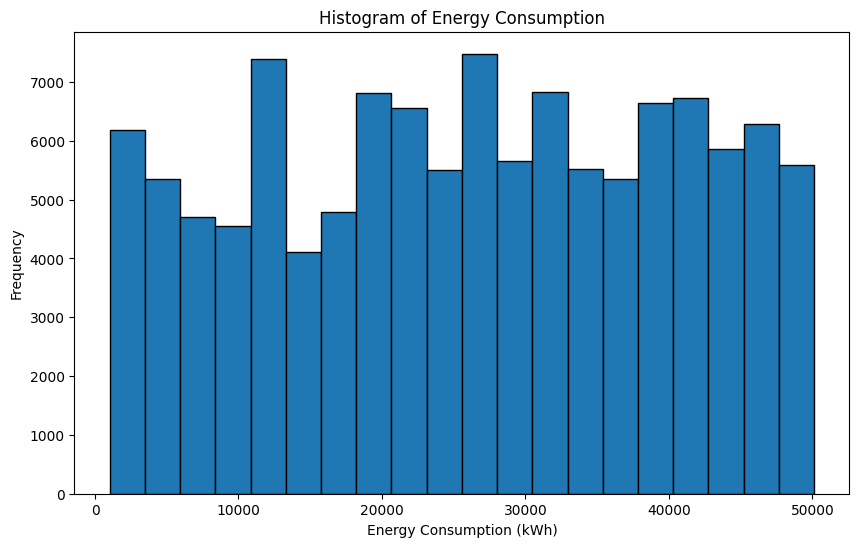

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Energy Consumption (kWh)'], bins=20, edgecolor='k')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

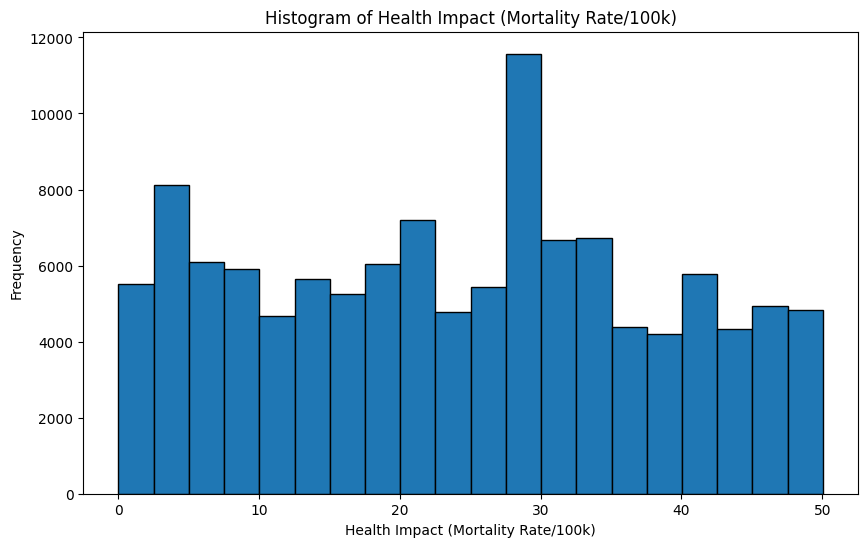

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Health Impact (Mortality Rate/100k)'], bins=20, edgecolor='k')
plt.title('Histogram of Health Impact (Mortality Rate/100k)')
plt.xlabel('Health Impact (Mortality Rate/100k)')
plt.ylabel('Frequency')
plt.show()

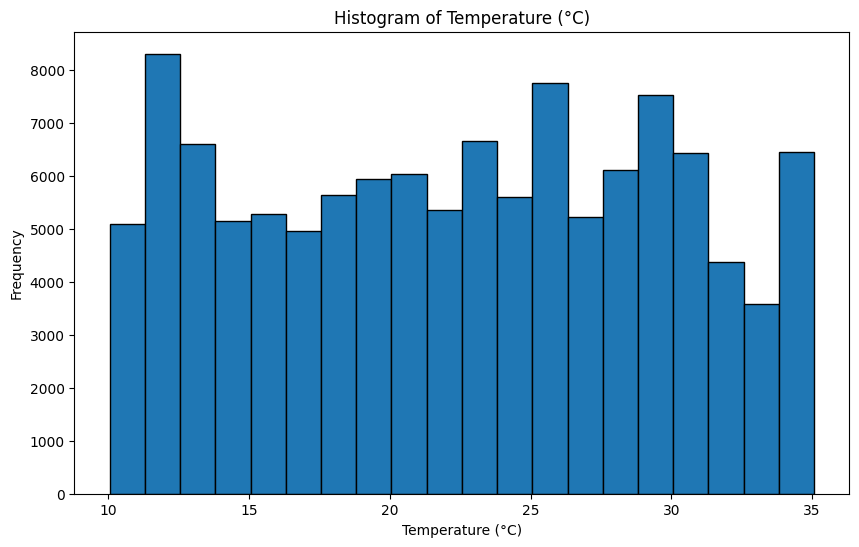

In [9]:
# make plot for Temperature (°C)

plt.figure(figsize=(10, 6))
plt.hist(df['Temperature (°C)'], bins=20, edgecolor='k')
plt.title('Histogram of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [10]:
# data cleaning
df.columns

Index(['City Name', 'Latitude', 'Longitude', 'Elevation (m)',
       'Temperature (°C)', 'Land Cover', 'Population Density (people/km²)',
       'Energy Consumption (kWh)', 'Air Quality Index (AQI)',
       'Urban Greenness Ratio (%)', 'Health Impact (Mortality Rate/100k)',
       'Wind Speed (km/h)', 'Humidity (%)', 'Annual Rainfall (mm)',
       'GDP per Capita (USD)'],
      dtype='object')

In [11]:
num_cols = df.select_dtypes(include=['number']).columns.drop('Health Impact (Mortality Rate/100k)')
num_cols

Index(['Latitude', 'Longitude', 'Elevation (m)', 'Temperature (°C)',
       'Population Density (people/km²)', 'Energy Consumption (kWh)',
       'Air Quality Index (AQI)', 'Urban Greenness Ratio (%)',
       'Wind Speed (km/h)', 'Humidity (%)', 'Annual Rainfall (mm)',
       'GDP per Capita (USD)'],
      dtype='object')

In [12]:
# impute columns with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df.isnull().sum()

City Name                              0
Latitude                               0
Longitude                              0
Elevation (m)                          0
Temperature (°C)                       0
Land Cover                             0
Population Density (people/km²)        0
Energy Consumption (kWh)               0
Air Quality Index (AQI)                0
Urban Greenness Ratio (%)              0
Health Impact (Mortality Rate/100k)    0
Wind Speed (km/h)                      0
Humidity (%)                           0
Annual Rainfall (mm)                   0
GDP per Capita (USD)                   0
dtype: int64

In [13]:
# remove duplicates
df.shape


(118055, 15)

In [14]:
df = df.drop_duplicates()
df.shape

(118000, 15)

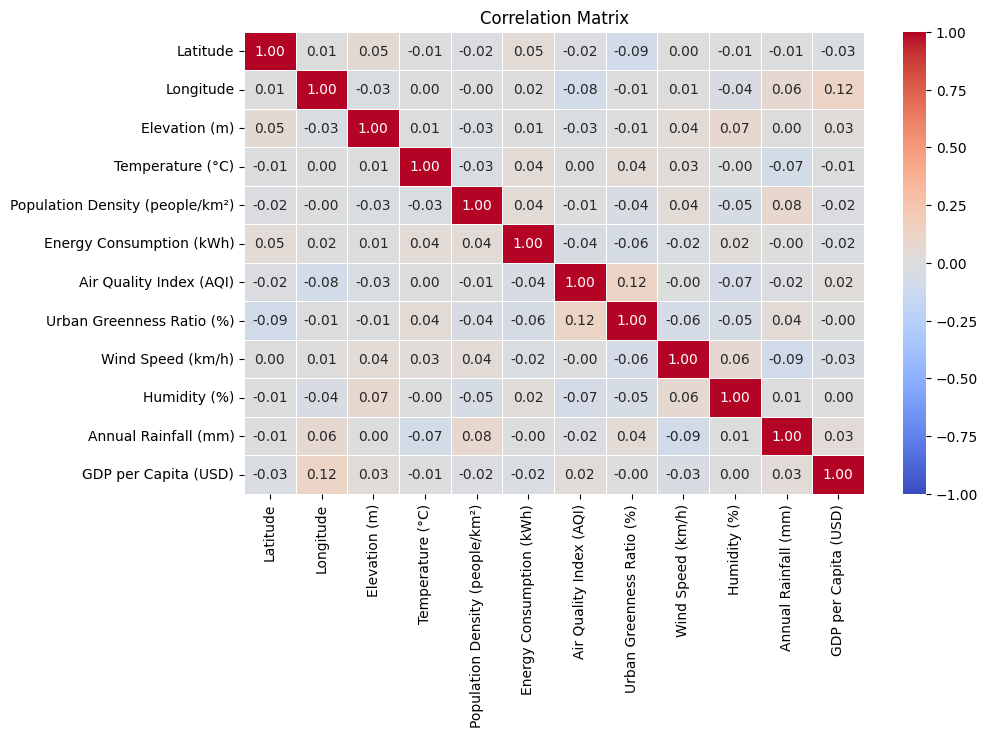

In [15]:
# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [16]:
# There appears to be no major correlation, however we have sufficient data to train a model and develop conclusions

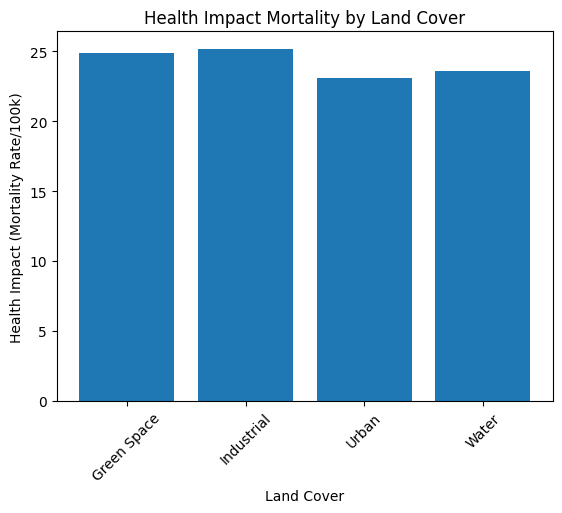

In [17]:
# create bars of health impact mortality grouped by land cover
health_impact_mortality = df.groupby('Land Cover')['Health Impact (Mortality Rate/100k)'].mean()
plt.bar(health_impact_mortality.index, health_impact_mortality)
plt.xticks(rotation=45)
plt.xlabel('Land Cover')
plt.ylabel('Health Impact (Mortality Rate/100k)')
plt.title('Health Impact Mortality by Land Cover')
plt.show()

In [18]:
# Encode Categorical Data

df = pd.get_dummies(df, columns=['Land Cover'])

# convert true/false to 1/0
df['Land Cover_Green Space'] = df['Land Cover_Green Space'].astype(int)
df['Land Cover_Industrial'] = df['Land Cover_Industrial'].astype(int)
df['Land Cover_Urban'] = df['Land Cover_Urban'].astype(int)
df['Land Cover_Water'] = df['Land Cover_Water'].astype(int)


In [19]:
df.head()

,City Name,Latitude,Longitude,Elevation (m),Temperature (°C),Population Density (people/km²),Energy Consumption (kWh),Air Quality Index (AQI),Urban Greenness Ratio (%),Health Impact (Mortality Rate/100k),Wind Speed (km/h),Humidity (%),Annual Rainfall (mm),GDP per Capita (USD),Land Cover_Green Space,Land Cover_Industrial,Land Cover_Urban,Land Cover_Water
0,City_236,40.014907,135.759794,1657.234222,32.140727,638.140184,29866.608120,90.967582,51.032061,20.060893,0.017909,46.681317,1750.054664,13551.38192,0,1,0,0
1,City_487,-81.752906,67.784550,1781.007943,28.199772,2757.814606,25461.567500,121.919061,17.819991,45.591306,1.585266,43.291975,758.591768,41967.28373,0,0,0,1
2,City_21,20.126899,33.924075,3140.598901,11.492930,6020.462986,2539.737270,169.190188,51.045248,10.525874,8.614523,76.935296,2494.912602,17335.37251,0,0,0,1
3,City_216,-47.308667,154.638241,992.282813,34.909265,9491.952711,32146.724390,90.989624,19.211930,49.900393,0.297596,42.739059,1762.646698,31400.53605,1,0,0,0
4,City_292,-83.425194,31.018268,597.192562,28.465786,5191.476501,2513.126338,92.082516,51.178231,21.993127,19.375498,43.509082,2134.723878,27399.94789,0,0,0,1


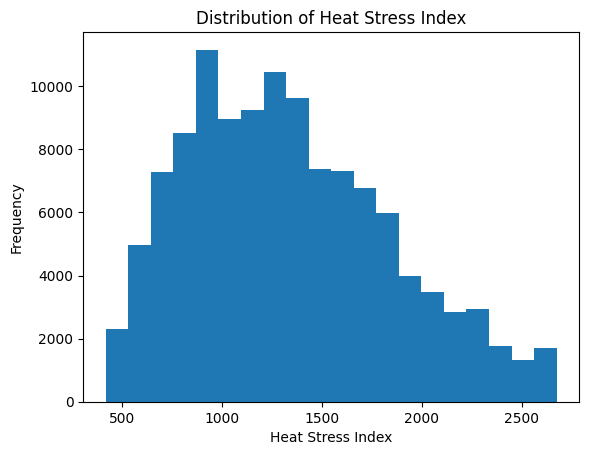

In [20]:
df['Heat Stress Index'] = df['Humidity (%)'] * df['Temperature (°C)']

# plot heat stress index by histogram
plt.hist(df['Heat Stress Index'], bins=20)
plt.xlabel('Heat Stress Index')
plt.ylabel('Frequency')
plt.title('Distribution of Heat Stress Index')
plt.show()

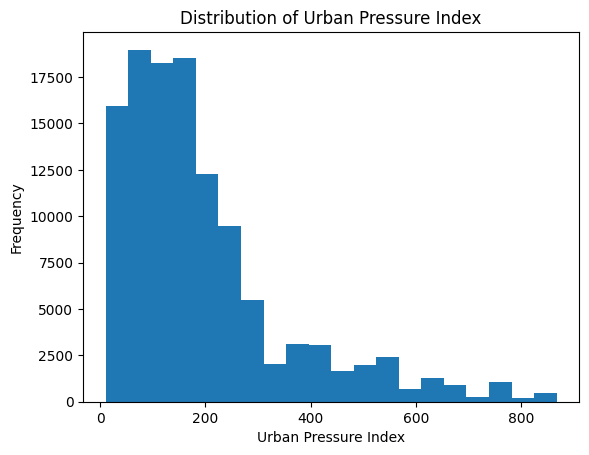

In [21]:
df['Urban Pressure Index'] = df['Population Density (people/km²)'] / df['Urban Greenness Ratio (%)']

# plot urban pressure index by histogram
plt.hist(df['Urban Pressure Index'], bins=20)
plt.xlabel('Urban Pressure Index')
plt.ylabel('Frequency')
plt.title('Distribution of Urban Pressure Index')
plt.show()

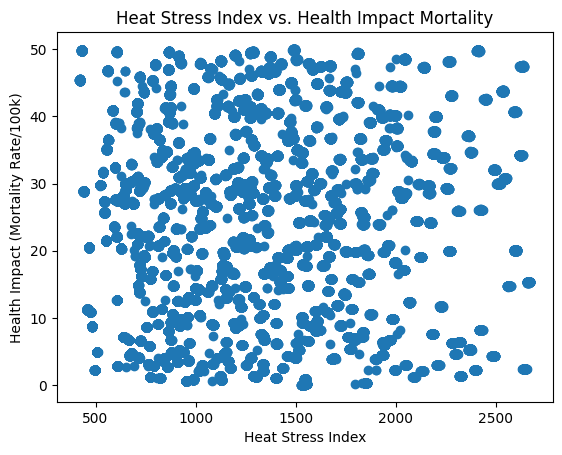

In [26]:
# Scatter plot of heat stress index vs. health impact mortality
plt.scatter(df['Heat Stress Index'], df['Health Impact (Mortality Rate/100k)'])
plt.xlabel('Heat Stress Index')
plt.ylabel('Health Impact (Mortality Rate/100k)')
plt.title('Heat Stress Index vs. Health Impact Mortality')
plt.show()

In [23]:
# There appears to be no correlation.

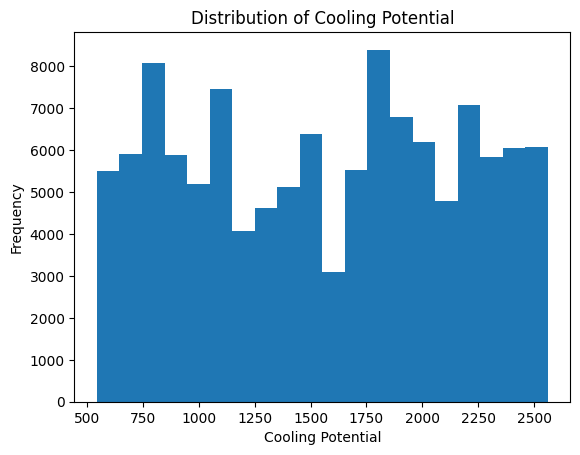

In [30]:
df['Cooling Potential'] = df['Wind Speed (km/h)'] + df['Urban Greenness Ratio (%)'] + df['Annual Rainfall (mm)']

# Histogram of cooling potential
plt.hist(df['Cooling Potential'], bins=20)
plt.xlabel('Cooling Potential')
plt.ylabel('Frequency')
plt.title('Distribution of Cooling Potential')
plt.show()